### 필요 라이브러리 설치

In [1]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 653.6 kB/s eta 0:00:16
   ---- ----------------------------------- 1.1/9.9 MB 11.7 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.9 MB 17.9 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.9 MB 23.7 MB/s eta 0:00:01
   -------------------------- ------------- 6.5/9.9 MB 27.8 MB/s eta 0:00:01
   ----------------------------------- ---- 8.9/9.9 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------  9.9/9.9 MB 33.1 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 28.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   --------------------------------------- 233.9/233.9 kB 14.0 MB/s eta 0:00:00


### 필요 라이브러리 import

In [24]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


### 삼성전자 주가 가져오기

In [16]:
# https://velog.io/@choonsik_mom/ARIMA-SARIMA-auto-ARIMA%EB%A1%9C-%EC%82%BC%EC%A0%84-%EC%A3%BC%EA%B0%80-%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0
# 김성범 교수님 arima 실습


# df = fdr.DataReader('005930', '2023-01-01', '2024-02-28')
df = fdr.DataReader('005930', '2023-01-01', '2024-02-28').loc[:,'Close']
# df.info()
# df.tail(50)
# df.plot()
# fig = df['Close'].plot()

<class 'pandas.core.series.Series'>
DatetimeIndex: 285 entries, 2023-01-02 to 2024-02-28
Series name: Close
Non-Null Count  Dtype
--------------  -----
285 non-null    int64
dtypes: int64(1)
memory usage: 4.5 KB


In [18]:
# 기간 필터링
demands = df.loc[(df.index >= '2023-01-01') & (df.index <= '2024-02-14')]
demands.info()
demands

test_demands = df.loc[(df.index >= '2024-02-15') & (df.index <= '2024-02-28')]
test_demands.info()
test_demands

<class 'pandas.core.series.Series'>
DatetimeIndex: 275 entries, 2023-01-02 to 2024-02-14
Series name: Close
Non-Null Count  Dtype
--------------  -----
275 non-null    int64
dtypes: int64(1)
memory usage: 4.3 KB
<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2024-02-15 to 2024-02-28
Series name: Close
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


Date
2024-02-15    73000
2024-02-16    72800
2024-02-19    73800
2024-02-20    73300
2024-02-21    73000
2024-02-22    73100
2024-02-23    72900
2024-02-26    72800
2024-02-27    72900
2024-02-28    73200
Name: Close, dtype: int64

### 정상성 검증

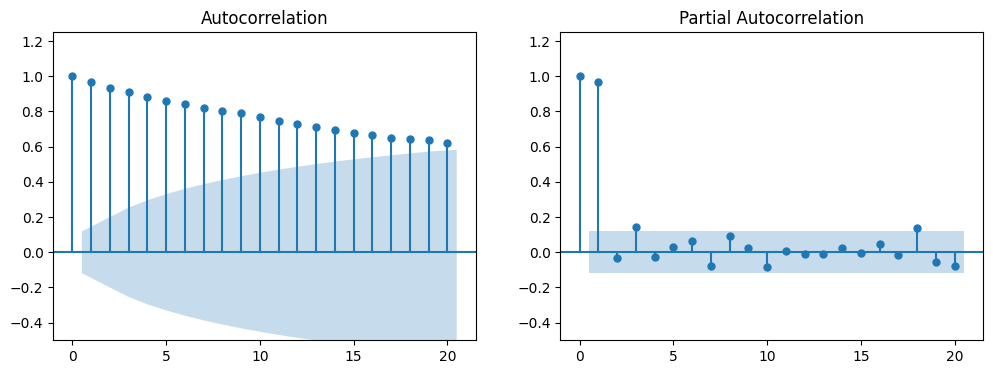

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 4)

# ACF Plot
plot_acf(demands.values, lags=20, ax=axes[0])
# PACF Plot
plot_pacf(demands.values, lags=20, ax=axes[1])

for ax in axes:
    ax.set_ylim(-0.5, 1.25)
plt.show()

In [26]:
# 1차 차분에 대한 결과
diff = 1
diff_1 = demands.diff(periods=diff).iloc[diff:]
# diff_1.values

In [27]:
from statsmodels.tsa.stattools import kpss
    
stats, p_value, nlags, critical_values = kpss(demands.values, nlags=30)
    
print(f'KPSS Stat: {stats:.5f}')
print(f'p-value: {p_value:.2f}') # p-value > 0.05 -> 정상성
print(f'Lags: {nlags}')

KPSS Stat: 0.81503
p-value: 0.01
Lags: 30


C:\Users\KwanhoKIm\AppData\Local\Temp\ipykernel_24316\554610093.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p_value, nlags, critical_values = kpss(demands.values, nlags=30)


### arima 모델 학습

In [81]:
model = ARIMA(demands.values[250:], order=(2, 1, 5)) # BEST
model_fit = model.fit()
print(model_fit.summary())
pred = model_fit.get_forecast(steps=len(test_demands))
# print(pred)
# print(pred.predicted_mean)

# print(pred.conf_int(alpha=0.95))
# # print(pred.astype(int))
# print(test_demands.to_list())
# # pred.conf_int(alpha=0.95)[:,0]
# print(test_demands.index)




c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   25
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -194.989
Date:                Sun, 01 Sep 2024   AIC                            405.977
Time:                        03:34:40   BIC                            415.402
Sample:                             0   HQIC                           408.478
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5833      0.144      4.048      0.000       0.301       0.866
ar.L2         -0.8196      0.102     -8.044      0.000      -1.019      -0.620
ma.L1         -0.6748      0.240     -2.812      0.0

### 결과 시각화

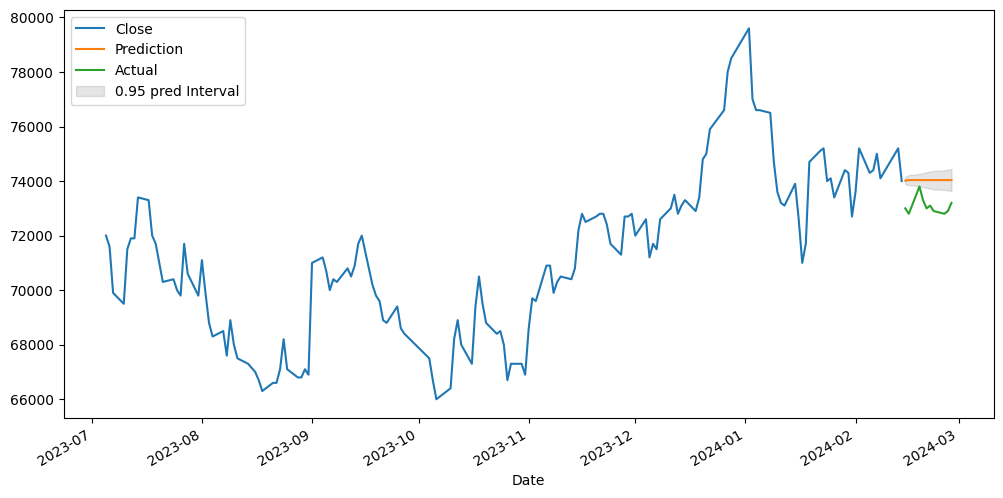

In [66]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(150).plot(ax =ax)
ax.plot(test_demands.index, pred.predicted_mean, label='Prediction')
ax.plot(test_demands.index, test_demands, label='Actual')
ax.fill_between(test_demands.index, pred.conf_int(alpha=0.90)[:,0], pred.conf_int(alpha=0.90)[:,1], color='k', alpha=0.1, label='0.95 pred Interval')
ax.legend(loc='upper left')
plt.show()

### hyperparameter 튜닝

In [68]:
import itertools

p = range(0, 6)
d = range(1, 2)
q = range(0, 6)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq :
    model = ARIMA(demands.values[250:], order=(i))
    model_fit = model.fit()
    print(f'ARIMA pdq : {i} >> AIC : {round(model_fit.aic, 2)}')
    AIC.append(round(model_fit.aic, 2))

ARIMA pdq : (0, 1, 0) >> AIC : 406.59
ARIMA pdq : (0, 1, 1) >> AIC : 407.69
ARIMA pdq : (0, 1, 2) >> AIC : 409.14
ARIMA pdq : (0, 1, 3) >> AIC : 414.72


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA pdq : (0, 1, 4) >> AIC : 412.7
ARIMA pdq : (0, 1, 5) >> AIC : 413.2
ARIMA pdq : (1, 1, 0) >> AIC : 407.55
ARIMA pdq : (1, 1, 1) >> AIC : 409.25
ARIMA pdq : (1, 1, 2) >> AIC : 413.53


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (1, 1, 3) >> AIC : 412.97
ARIMA pdq : (1, 1, 4) >> AIC : 414.9
ARIMA pdq : (1, 1, 5) >> AIC : 414.56
ARIMA pdq : (2, 1, 0) >> AIC : 409.16
ARIMA pdq : (2, 1, 1) >> AIC : 411.13


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (2, 1, 2) >> AIC : 413.65
ARIMA pdq : (2, 1, 3) >> AIC : 418.27
ARIMA pdq : (2, 1, 4) >> AIC : 416.4


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (2, 1, 5) >> AIC : 405.98
ARIMA pdq : (3, 1, 0) >> AIC : 411.12
ARIMA pdq : (3, 1, 1) >> AIC : 412.09
ARIMA pdq : (3, 1, 2) >> AIC : 417.48


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (3, 1, 3) >> AIC : 413.52


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (3, 1, 4) >> AIC : 439.78


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (3, 1, 5) >> AIC : 458.86
ARIMA pdq : (4, 1, 0) >> AIC : 412.51
ARIMA pdq : (4, 1, 1) >> AIC : 414.23
ARIMA pdq : (4, 1, 2) >> AIC : 417.76
ARIMA pdq : (4, 1, 3) >> AIC : 418.2


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (4, 1, 4) >> AIC : 431.36
ARIMA pdq : (4, 1, 5) >> AIC : 2438.55
ARIMA pdq : (5, 1, 0) >> AIC : 413.22
ARIMA pdq : (5, 1, 1) >> AIC : 414.55
ARIMA pdq : (5, 1, 2) >> AIC : 403.77


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (5, 1, 3) >> AIC : 407.5


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA pdq : (5, 1, 4) >> AIC : 417.14


LinAlgError: LU decomposition error.

### 평가

In [70]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE


print('MSE:', MSE(pred.predicted_mean, test_demands.to_list()))
print('MAE:', MAE(pred.predicted_mean, test_demands.to_list()))
print('MAPE:', MAPE(pred.predicted_mean, test_demands.to_list()))

MSE: 566942.0050333657
MAE: 724.9611236967976
MAPE: 0.009828179867697202


### 추가 samrima, auto arima

c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['season_order']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[74038.93031347 74019.82395417 74012.81531438 74000.64913008
 73995.33648036 73987.51426284 73983.61118485 73978.53874915
 73975.73097627 73972.41716635]


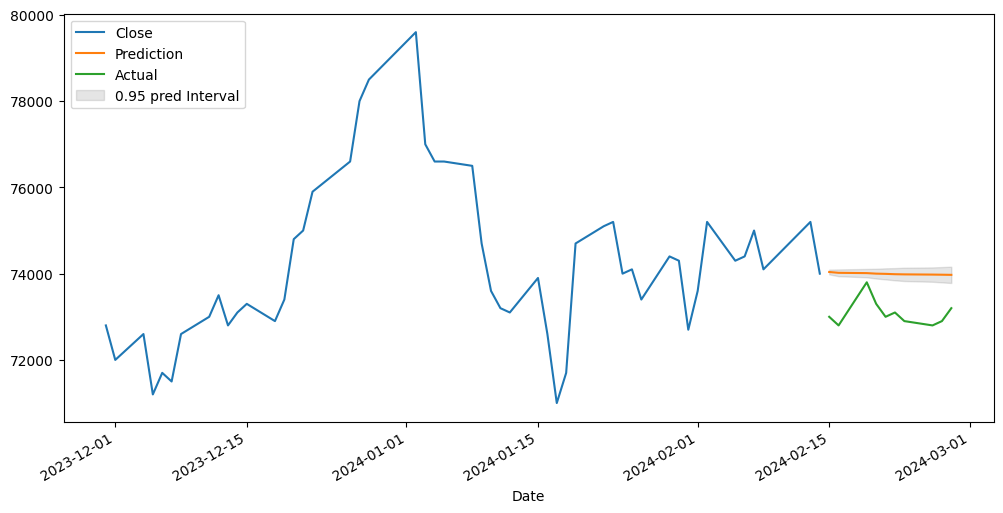

In [42]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# model = ARIMA(demands.values, order=(0, 1, 2))
model = SARIMAX(demands.values, 
                order=(2, 1, 3), 
                season_order = (2, 1, 2, 3)).fit(disp=False)
# model_fit = model.fit()
# print(model_fit.summary())

pred = model.get_forecast(steps=len(test_demands))
# pred = model_fit.predict(start=1)

# pred = auto_arima_model.predict(len(test_demands), return_conf_int=True)
# print(pred)
print(pred.predicted_mean)
# print(pred.conf_int(alpha=0.95))
# # print(pred.astype(int))
# print(test_demands.to_list())
# # pred.conf_int(alpha=0.95)[:,0]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
demands.tail(50).plot(ax =ax)
ax.plot(test_demands.index, pred.predicted_mean, label='Prediction')
ax.plot(test_demands.index, test_demands, label='Actual')
ax.fill_between(test_demands.index, pred.conf_int(alpha=0.95)[:,0], pred.conf_int(alpha=0.95)[:,1], color='k', alpha=0.1, label='0.95 pred Interval')
ax.legend(loc='upper left')
plt.show()

In [238]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 41.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------  2.8/2.8 MB 59.3 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 44.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 75.1 MB/s eta 0:00:00


In [239]:
from pmdarima.arima import auto_arima

auto_arima_model = auto_arima(demands.values, start_p=1, start_q=1, 
                             max_p=3, max_1=3, m=3, seasonal=True, # sarima(seasonal=True)
                             d=1, D=1,
                             max_P=3, max_Q=3, 
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True, 
                             stepwise=False)

 ARIMA(0,1,0)(0,1,0)[3]             : AIC=8772.288, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[3]             : AIC=8681.081, Time=0.97 sec
 ARIMA(0,1,0)(0,1,2)[3]             : AIC=8662.806, Time=1.83 sec
 ARIMA(0,1,0)(0,1,3)[3]             : AIC=8664.668, Time=2.49 sec
 ARIMA(0,1,0)(1,1,0)[3]             : AIC=8716.247, Time=0.26 sec
 ARIMA(0,1,0)(1,1,1)[3]             : AIC=8664.349, Time=1.53 sec
 ARIMA(0,1,0)(1,1,2)[3]             : AIC=8664.496, Time=3.00 sec
 ARIMA(0,1,0)(1,1,3)[3]             : AIC=inf, Time=3.02 sec
 ARIMA(0,1,0)(2,1,0)[3]             : AIC=8683.862, Time=0.36 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=8665.669, Time=1.55 sec
 ARIMA(0,1,0)(2,1,2)[3]             : AIC=8668.173, Time=3.28 sec
 ARIMA(0,1,0)(2,1,3)[3]             : AIC=inf, Time=3.98 sec
 ARIMA(0,1,0)(3,1,0)[3]             : AIC=8668.480, Time=1.30 sec
 ARIMA(0,1,0)(3,1,1)[3]             : AIC=inf, Time=3.21 sec
 ARIMA(0,1,0)(3,1,2)[3]             : AIC=inf, Time=4.40 sec
 ARIMA(0,1,1)(0,1,0)[3]       

In [8]:
from statsmodels.tsa.holtwinters import (ExponentialSmoothing, 
                                         SimpleExpSmoothing, 
                                         Holt)

ses_1 = SimpleExpSmoothing(demands).fit(smoothing_level=0.2)
# test_length = 예측하고자 하는 기간
ses_forecast_1 = ses_1.forecast(len(test_demands))
print(ses_forecast_1)

275    74373.996264
276    74373.996264
277    74373.996264
278    74373.996264
279    74373.996264
280    74373.996264
281    74373.996264
282    74373.996264
283    74373.996264
284    74373.996264
dtype: float64


c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Projects\io_ground\.conda\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
hs_3 = Holt(demands, exponential = False, damped = True).fit(damping_slope = 0.99)
hs_forecast_3 = hs_3.forecast(len(test_demands))
hs_forecast_3

hs_2 = Holt(demands, exponential = True).fit()
hs_forecast_2 = hs_2.forecast(len(test_demands))
hs_forecast_2

C:\Users\KwanhoKIm\AppData\Local\Temp\ipykernel_24316\2398373808.py:1: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  hs_3 = Holt(demands, exponential = False, damped = True).fit(damping_slope = 0.99)
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Projects\io_ground\.conda\Lib\site-packages\pandas\util\_decorators.py:213: FutureWarning: the 'damping_slope' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Projects\io_ground\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. 

275    74071.443383
276    74107.619910
277    74143.814105
278    74180.025977
279    74216.255535
280    74252.502788
281    74288.767743
282    74325.050411
283    74361.350799
284    74397.668916
dtype: float64

In [14]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

print('MSE:', MSE(hs_forecast_2, test_demands.to_list()))
print('MAE:', MAE(hs_forecast_2, test_demands.to_list()))
print('MAPE:', MAPE(hs_forecast_2, test_demands.to_list()))

MSE: 1438246.6405732539
MAE: 1154.4499567424937
MAPE: 0.015548284462536458
